PNEUMONIA DATASET GROUP ASSIGNMENT

In [94]:
import matplotlib.pyplot as plt
import numpy as np
import tensorflow as tf
from tensorflow import keras
from keras.models import Sequential
from keras.layers import Conv2D, AveragePooling2D, MaxPooling2D, Dropout, Flatten, Dense, Activation, BatchNormalization

import os
import cv2
import re
from PIL import Image

In [95]:
train_dir = './Pneumonia_Dataset/chest_xray/train'
test_dir = './Pneumonia_Dataset/chest_xray/test'
directory_type = ['NORMAL', 'PNEUMONIA']

p_type = ['NORMAL', 'BACTERIAL', 'VIRAL'] #PNEUMONIA_TYPE 0 = Normal, 1 = Bacterial, 2 = Viral
trn_images = []
trn_img_type = []

tst_images = []
tst_img_type = []

In [96]:
for category in directory_type:
    path = os.path.join(train_dir, category)
    for img in os.listdir(path):
        if re.search("virus", img) is not None:
            trn_img_type.append(2)
        elif re.search("bacteria", img) is not None:
            trn_img_type.append(1)
        else:
            trn_img_type.append(0)
        trn_images.append(img)

for category in directory_type:
    path = os.path.join(test_dir, category)
    for img in os.listdir(path):
        if re.search("virus", img) is not None:
            tst_img_type.append(2)
        elif re.search("bacteria", img) is not None:
            tst_img_type.append(1)
        else:
            tst_img_type.append(0)
        tst_images.append(img)


<AxesSubplot:>

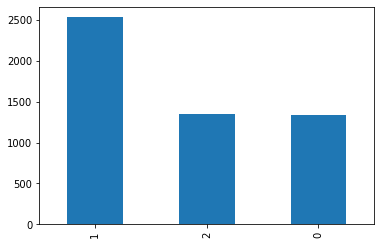

In [97]:
df['p_type'].value_counts().plot.bar() # Show how many of photo types there are (in the training set)

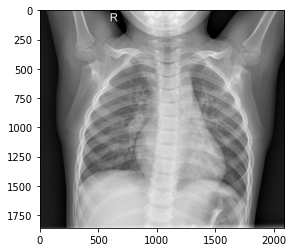

In [98]:
for category in directory_type:
    path = os.path.join(train_dir, category)
    for img in os.listdir(path):
        img_array = cv2.imread(os.path.join(path,img), cv2.IMREAD_GRAYSCALE)
        plt.imshow(img_array, cmap='gray')
        plt.show()
        break
    break


In [99]:
print(img_array.shape)
IMG_SIZE = 128

(1858, 2090)


In [100]:
#CNN
model = Sequential()


model.add(Conv2D(24, (3,3), activation='relu', input_shape=(200,200,3)))
model.add(AveragePooling2D(3,3))
model.add(Conv2D(48, (3,3), activation='relu'))
model.add(MaxPooling2D(3,3))
model.add(Conv2D(24, (2,2), activation='relu'))
model.add(Dense(36, activation='relu'))
model.add(Flatten())
model.add(Dense(36, activation='relu'))
model.add(Dropout(0.5))
model.add(Dense(3, activation='softmax')) 


    

In [101]:
model.compile(optimizer='adam',
            loss=keras.losses.SparseCategoricalCrossentropy(),
            metrics=['accuracy'])

model.summary()

Model: "sequential_21"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_55 (Conv2D)           (None, 198, 198, 24)      672       
_________________________________________________________________
average_pooling2d_14 (Averag (None, 66, 66, 24)        0         
_________________________________________________________________
conv2d_56 (Conv2D)           (None, 64, 64, 48)        10416     
_________________________________________________________________
max_pooling2d_14 (MaxPooling (None, 21, 21, 48)        0         
_________________________________________________________________
conv2d_57 (Conv2D)           (None, 20, 20, 24)        4632      
_________________________________________________________________
dense_37 (Dense)             (None, 20, 20, 36)        900       
_________________________________________________________________
flatten_14 (Flatten)         (None, 14400)           

In [102]:
model.fit(trn_images, trn_img_type, epochs=5, batch_size=32)

Epoch 1/5


ValueError: in user code:

    C:\Users\Miron\AppData\Local\Programs\Python\Python39\lib\site-packages\keras\engine\training.py:853 train_function  *
        return step_function(self, iterator)
    C:\Users\Miron\AppData\Local\Programs\Python\Python39\lib\site-packages\keras\engine\training.py:842 step_function  **
        outputs = model.distribute_strategy.run(run_step, args=(data,))
    C:\Users\Miron\AppData\Local\Programs\Python\Python39\lib\site-packages\tensorflow\python\distribute\distribute_lib.py:1286 run
        return self._extended.call_for_each_replica(fn, args=args, kwargs=kwargs)
    C:\Users\Miron\AppData\Local\Programs\Python\Python39\lib\site-packages\tensorflow\python\distribute\distribute_lib.py:2849 call_for_each_replica
        return self._call_for_each_replica(fn, args, kwargs)
    C:\Users\Miron\AppData\Local\Programs\Python\Python39\lib\site-packages\tensorflow\python\distribute\distribute_lib.py:3632 _call_for_each_replica
        return fn(*args, **kwargs)
    C:\Users\Miron\AppData\Local\Programs\Python\Python39\lib\site-packages\keras\engine\training.py:835 run_step  **
        outputs = model.train_step(data)
    C:\Users\Miron\AppData\Local\Programs\Python\Python39\lib\site-packages\keras\engine\training.py:787 train_step
        y_pred = self(x, training=True)
    C:\Users\Miron\AppData\Local\Programs\Python\Python39\lib\site-packages\keras\engine\base_layer.py:1020 __call__
        input_spec.assert_input_compatibility(self.input_spec, inputs, self.name)
    C:\Users\Miron\AppData\Local\Programs\Python\Python39\lib\site-packages\keras\engine\input_spec.py:229 assert_input_compatibility
        raise ValueError('Input ' + str(input_index) + ' of layer ' +

    ValueError: Input 0 of layer sequential_21 is incompatible with the layer: : expected min_ndim=4, found ndim=2. Full shape received: (32, 1)
